In [1]:
# A bit of imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import genfromtxt
from scipy.spatial.distance import cdist, pdist

# Hide warnings if there are any
import warnings
warnings.filterwarnings('ignore')

# Load in the R magic
%load_ext rpy2.ipython

In [2]:
# loading raw data
awsr_data = pd.read_csv('./data/api-aws-recognition.csv', delimiter=',')
ggv_data = pd.read_csv('./data/api-google-vision.csv', delimiter=',')
mser_data = pd.read_csv('./data/api-ms-emotion.csv', delimiter=',')

# drop not needed cols
awsr_data.drop('id', axis=1, inplace=True)
awsr_data.drop('block', axis=1, inplace=True)
awsr_data.drop('imgfilename', axis=1, inplace=True)
awsr_data.drop('version', axis=1, inplace=True)
awsr_data.drop('imgtimestamp', axis=1, inplace=True)

ggv_data.drop('id', axis=1, inplace=True)
ggv_data.drop('block', axis=1, inplace=True)
ggv_data.drop('imgfilename', axis=1, inplace=True)
ggv_data.drop('version', axis=1, inplace=True)
ggv_data.drop('imgtimestamp', axis=1, inplace=True)

mser_data.drop('id', axis=1, inplace=True)
mser_data.drop('block', axis=1, inplace=True)
mser_data.drop('imgfilename', axis=1, inplace=True)
mser_data.drop('version', axis=1, inplace=True)
mser_data.drop('imgtimestamp', axis=1, inplace=True)

# filter data take only detection == True
awsr_data = awsr_data.loc[awsr_data['detection'] == True]
ggv_data = ggv_data.loc[ggv_data['detection'] == True]
mser_data = mser_data.loc[mser_data['detection'] == True]

awsr_data = awsr_data[awsr_data['imgfps'].isin(['10fps', '3fps', '1fps', '1fp5s'])]
ggv_data = ggv_data[ggv_data['imgfps'].isin(['10fps', '3fps', '1fps', '1fp5s'])]
mser_data = mser_data[mser_data['imgfps'].isin(['10fps', '3fps', '1fps', '1fp5s'])]

# projecting on emotions only
awsr_data_e = awsr_data[['happy', 'sad', 'angry', 'confused', 'disgusted', 'surprised', 'calm']]
ggv_data_e = ggv_data[['joy', 'anger', 'sorrow', 'surprise', 'unknown']]
mser_data_e = mser_data[['neutral','contempt','disgust','happiness','sadness','fear','surprise','anger']]

# print shapes
print('AWS Recognition data : ', awsr_data_e.shape)
print('Google Vision data : ', ggv_data_e.shape)
print('Microsoft Emotion data : ', mser_data_e.shape)

AWS Recognition data :  (12676, 7)
Google Vision data :  (12621, 5)
Microsoft Emotion data :  (12155, 8)


In [198]:
# computing tss for each one.. this will take a lot of time
awTss = sum(pdist(awsr_data_e)**2) / awsr_data_e.shape[0]
gvTss = sum(pdist(ggv_data_e)**2) / ggv_data_e.shape[0]
msTss = sum(pdist(mser_data_e)**2) / mser_data_e.shape[0]

In [199]:
print('awTss ', awTss)
print('gvTss ', gvTss)
print('msTss ', msTss)

awTss  29906744.9539
gvTss  43273300.3761
msTss  3761.00805786


In [3]:
# already computed
awTss = 29906744.9539
gvTss = 43273300.3761
msTss = 3761.00805786

In [4]:
# computing means
awsr_data_e_means = awsr_data.groupby(['imgfps'])['happy', 'sad', 'angry', 'confused', 'disgusted', 'surprised', 'calm'].mean()
ggv_data_e_means  = ggv_data.groupby(['imgfps'])['joy', 'anger', 'sorrow', 'surprise', 'unknown'].mean()
mser_data_e_means = mser_data.groupby(['imgfps'])['neutral', 'contempt', 'disgust', 'happiness','sadness', 'fear', 'surprise', 'anger'].mean()

In [5]:
## AWS
## computing AWS_WSS, AWS_BSS, AWS_BSS_TSS
AWS_WSS = {} 
AWS_BSS = {}
AWS_BSS_TSS = {}
AWS_WSS_TSS = {}

for imgfps, awsr_data_imgfps in awsr_data.groupby('imgfps'):
    fpsdata = awsr_data_imgfps[['happy', 'sad', 'angry', 'confused', 'disgusted', 'surprised', 'calm']].values
    wss = fpsdata - awsr_data_e_means.loc[imgfps].values
    wss = wss ** 2
    wss = np.sum(wss, axis = 0)
    bss = awTss - wss
    AWS_BSS[imgfps] = bss
    AWS_BSS_TSS[imgfps] = bss / awTss * 100
    AWS_WSS_TSS[imgfps] = wss / awTss * 100
    AWS_WSS[imgfps] = wss
 
#print('AWS_WSS ', AWS_WSS)
#print('AWS_BSS ', AWS_BSS)
#print('AWS_BSS_TSS ', AWS_BSS_TSS)

In [6]:
## GGV
## computing GGV_WSS, GGV_BSS, GGV_BSS_TSS
GGV_WSS = {} 
GGV_BSS = {}
GGV_BSS_TSS = {}
GGV_WSS_TSS = {}

for imgfps, ggv_data_imgfps in ggv_data.groupby('imgfps'):
    wss = ggv_data_imgfps[['joy', 'anger', 'sorrow', 'surprise', 'unknown']].values - ggv_data_e_means.loc[imgfps].values
    wss = wss ** 2
    wss = np.sum(wss, axis = 0)
    bss = gvTss - wss
    GGV_BSS[imgfps] = bss
    GGV_BSS_TSS[imgfps] = bss / gvTss * 100
    GGV_WSS_TSS[imgfps] = wss / gvTss * 100
    GGV_WSS[imgfps] = wss

#print('GGV_WSS ', GGV_WSS)
#print('GGV_BSS ', GGV_BSS)
#print('GGV_BSS_TSS ', GGV_BSS_TSS)

In [7]:
## MSER
## computing MSER_WSS, MSER_BSS, MSER_BSS_TSS
MSER_WSS = {} 
MSER_BSS = {}
MSER_BSS_TSS = {}
MSER_WSS_TSS = {}

for imgfps, mser_data_imgfps in mser_data.groupby('imgfps'):
    wss = mser_data_imgfps[['neutral', 'contempt', 'disgust', 'happiness','sadness', 'fear', 'surprise', 'anger']].values - mser_data_e_means.loc[imgfps].values
    wss = wss ** 2
    wss = np.sum(wss, axis = 0)
    bss = msTss - wss
    MSER_BSS[imgfps] = bss
    MSER_BSS_TSS[imgfps] = bss / msTss * 100
    MSER_WSS_TSS[imgfps] = wss / msTss * 100
    MSER_WSS[imgfps] = wss

#print('MSER_WSS ', MSER_WSS)
#print('MSER_BSS ', MSER_BSS)
#print('MSER_BSS_TSS ', MSER_BSS_TSS)

In [8]:
# construct dataframe
AWS_BSS_TSS_DF = pd.DataFrame(np.vstack(AWS_WSS_TSS.values()), columns=['happy', 'sad', 'angry', 'confused', 'disgusted', 'surprised', 'calm'])
AWS_BSS_TSS_DF['imgfps'] = ['10fps', '1fp5s', '1fps', '3fps']

GGV_BSS_TSS_DF = pd.DataFrame(np.vstack(GGV_WSS_TSS.values()), columns=['joy', 'anger', 'sorrow', 'surprise', 'unknown'])
GGV_BSS_TSS_DF['imgfps'] = ['10fps', '1fp5s', '1fps', '3fps']

MSER_BSS_TSS_DF = pd.DataFrame(np.vstack(MSER_WSS_TSS.values()), columns=['neutral', 'contempt', 'disgust', 'happiness','sadness', 'fear', 'surprise', 'anger'])
MSER_BSS_TSS_DF['imgfps'] = ['10fps', '1fp5s', '1fps', '3fps']

In [9]:
%%R -i AWS_BSS_TSS_DF -i GGV_BSS_TSS_DF -i MSER_BSS_TSS_DF
library(reshape2)

AWS_BSS_TSS_DF <- melt(AWS_BSS_TSS_DF,
                 id.vars = c('imgfps'),
                 measure.vars = c('happy', 'sad', 'angry', 'confused', 'disgusted', 'surprised', 'calm'),
                 variable.name = 'emotion')

GGV_BSS_TSS_DF <- melt(GGV_BSS_TSS_DF,
                 id.vars = c('imgfps'),
                 measure.vars = c('joy', 'anger', 'sorrow', 'surprise', 'unknown'),
                 variable.name = 'emotion')

MSER_BSS_TSS_DF <- melt(MSER_BSS_TSS_DF,
                 id.vars = c('imgfps'),
                 measure.vars = c('neutral','contempt','disgust','happiness','sadness','fear','surprise','anger'),
                 variable.name = 'emotion')

names(AWS_BSS_TSS_DF)[names(AWS_BSS_TSS_DF) == 'value'] <- 'score'
names(GGV_BSS_TSS_DF)[names(GGV_BSS_TSS_DF) == 'value'] <- 'score'
names(MSER_BSS_TSS_DF)[names(MSER_BSS_TSS_DF) == 'value'] <- 'score'

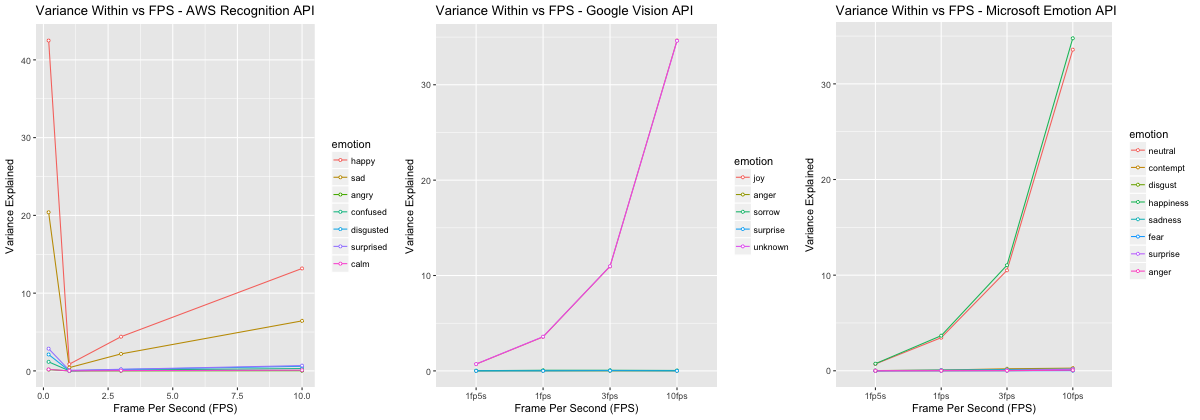

In [19]:
%%R -w 1200 -h 420 -u px
library(ggplot2)
require(gridExtra)
library(ggthemes)
library(scales)

AWS_BSS_TSS_DF$imgfps = factor(AWS_BSS_TSS_DF$imgfps, levels=c('1fp5s', '1fps', '3fps', '10fps'))
GGV_BSS_TSS_DF$imgfps = factor(GGV_BSS_TSS_DF$imgfps, levels=c('1fp5s', '1fps',  '3fps', '10fps'))
MSER_BSS_TSS_DF$imgfps = factor(MSER_BSS_TSS_DF$imgfps, levels=c('1fp5s', '1fps', '3fps', '10fps'))

AWS = ggplot(AWS_BSS_TSS_DF, aes(x=as.numeric(rep(c(1/5, 1, 3, 10), times = 7)), y=score, colour=emotion, group=emotion)) + geom_line() + geom_point(size=1.1, shape=21, fill='white') + xlab('Frame Per Second (FPS)') + ylab('Variance Explained') + ggtitle('Variance Within vs FPS - AWS Recognition API')
GGV = ggplot(GGV_BSS_TSS_DF, aes(x=imgfps, y=score, colour=emotion, group=emotion)) + geom_line() + geom_point(size=1.1, shape=21, fill='white') + xlab('Frame Per Second (FPS)') + ylab('Variance Explained') + ggtitle('Variance Within vs FPS - Google Vision API') 
MSER = ggplot(MSER_BSS_TSS_DF, aes(x=imgfps, y=score, colour=emotion, group=emotion)) + geom_line() + geom_point(size=1.1, shape=21, fill='white') + xlab('Frame Per Second (FPS)') + ylab('Variance Explained') + ggtitle('Variance Within vs FPS - Microsoft Emotion API') 

ppi = 1000
plot = grid.arrange(arrangeGrob(AWS, GGV, MSER, ncol=3))

ggsave("plot-within-variance.png", plot, width=15, height=6, dpi=ppi)

In [289]:
# construct dataframe FOR BSS_TSSS
AWS_BSS_TSS_DF = pd.DataFrame(np.vstack(AWS_BSS_TSS.values()), columns=['happy', 'sad', 'angry', 'confused', 'disgusted', 'surprised', 'calm'])
AWS_BSS_TSS_DF['imgfps'] = ['10fps', '1fp5s', '1fps', '3fps']

GGV_BSS_TSS_DF = pd.DataFrame(np.vstack(GGV_BSS_TSS.values()), columns=['joy', 'anger', 'sorrow', 'surprise', 'unknown'])
GGV_BSS_TSS_DF['imgfps'] = ['10fps', '1fp5s', '1fps', '3fps']

MSER_BSS_TSS_DF = pd.DataFrame(np.vstack(MSER_BSS_TSS.values()), columns=['neutral', 'contempt', 'disgust', 'happiness','sadness', 'fear', 'surprise', 'anger'])
MSER_BSS_TSS_DF['imgfps'] = ['10fps', '1fp5s', '1fps', '3fps']

In [290]:
%%R -i AWS_BSS_TSS_DF -i GGV_BSS_TSS_DF -i MSER_BSS_TSS_DF
library(reshape2)

AWS_BSS_TSS_DF <- melt(AWS_BSS_TSS_DF,
                 id.vars = c('imgfps'),
                 measure.vars = c('happy', 'sad', 'angry', 'confused', 'disgusted', 'surprised', 'calm'),
                 variable.name = 'emotion')

GGV_BSS_TSS_DF <- melt(GGV_BSS_TSS_DF,
                 id.vars = c('imgfps'),
                 measure.vars = c('joy', 'anger', 'sorrow', 'surprise', 'unknown'),
                 variable.name = 'emotion')

MSER_BSS_TSS_DF <- melt(MSER_BSS_TSS_DF,
                 id.vars = c('imgfps'),
                 measure.vars = c('neutral','contempt','disgust','happiness','sadness','fear','surprise','anger'),
                 variable.name = 'emotion')

names(AWS_BSS_TSS_DF)[names(AWS_BSS_TSS_DF) == 'value'] <- 'score'
names(GGV_BSS_TSS_DF)[names(GGV_BSS_TSS_DF) == 'value'] <- 'score'
names(MSER_BSS_TSS_DF)[names(MSER_BSS_TSS_DF) == 'value'] <- 'score'

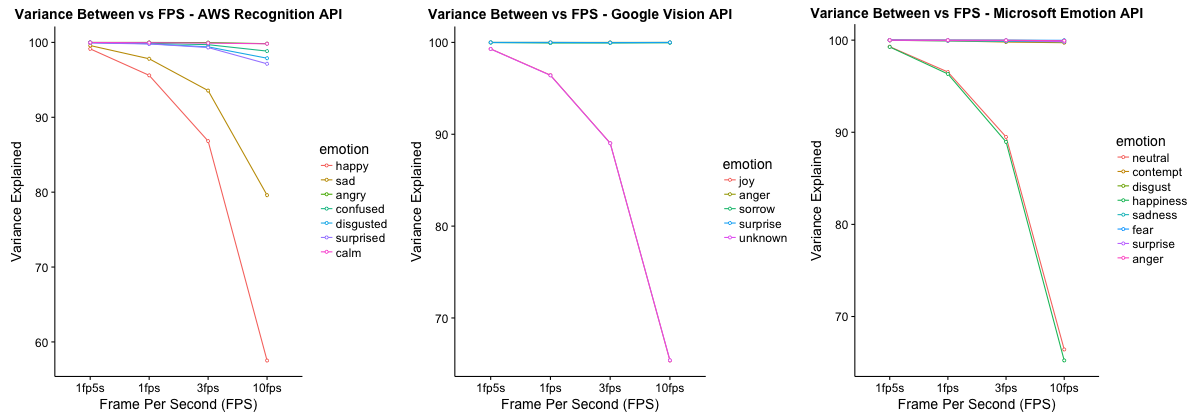

In [291]:
%%R -w 1200 -h 420 -u px
library(ggplot2)
require(gridExtra)

AWS_BSS_TSS_DF$imgfps = factor(AWS_BSS_TSS_DF$imgfps, levels=c('1fp5s', '1fps', '3fps', '10fps'))
GGV_BSS_TSS_DF$imgfps = factor(GGV_BSS_TSS_DF$imgfps, levels=c('1fp5s', '1fps',  '3fps', '10fps'))
MSER_BSS_TSS_DF$imgfps = factor(MSER_BSS_TSS_DF$imgfps, levels=c('1fp5s', '1fps', '3fps', '10fps'))

AWS = ggplot(AWS_BSS_TSS_DF, aes(x=imgfps, y=score, colour=emotion, group=emotion)) + geom_line() + geom_point(size=1.1, shape=21, fill='white') + xlab('Frame Per Second (FPS)') + ylab('Variance Explained') + ggtitle('Variance Between vs FPS - AWS Recognition API') 
GGV = ggplot(GGV_BSS_TSS_DF, aes(x=imgfps, y=score, colour=emotion, group=emotion)) + geom_line() + geom_point(size=1.1, shape=21, fill='white') + xlab('Frame Per Second (FPS)') + ylab('Variance Explained') + ggtitle('Variance Between vs FPS - Google Vision API') 
MSER = ggplot(MSER_BSS_TSS_DF, aes(x=imgfps, y=score, colour=emotion, group=emotion)) + geom_line() + geom_point(size=1.1, shape=21, fill='white') + xlab('Frame Per Second (FPS)') + ylab('Variance Explained') + ggtitle('Variance Between vs FPS - Microsoft Emotion API') 

ppi = 1000
plot = grid.arrange(arrangeGrob(AWS, GGV, MSER, ncol=3))

ggsave("plot-between-variance.png", plot, width=15, height=6, dpi=ppi)

In [96]:
# A bit of imports
from natsort import natsorted, ns
from glob import glob
from os import path

In [97]:
workingDir = '/Users/deep/SpeakPlus/Dev/juno/emotionApiValidity/src/data/done'

_20fps = glob(path.join(workingDir, 'screenshots/20fps/*.jpg'))
_10fps = glob(path.join(workingDir, 'screenshots/10fps/*.jpg'))
_3fps = glob(path.join(workingDir, 'screenshots/3fps/*.jpg'))
_1fps = glob(path.join(workingDir, 'screenshots/1fps/*.jpg'))


In [98]:
_20fps = natsorted(_20fps, key=lambda y: y.lower())
_10fps = natsorted(_10fps, key=lambda y: y.lower())
_3fps = natsorted(_3fps, key=lambda y: y.lower())
_1fps = natsorted(_1fps, key=lambda y: y.lower())

In [100]:
f1fps = open(path.join(workingDir, '1fps.txt'), 'w')

for item in _1fps:
    f1fps.write("%s\n" % item)
    
f1fps.close() 

In [101]:
f20fps = open(path.join(workingDir, '20fps.txt'), 'w')
for item in _20fps:
    f20fps.write("%s\n" % item)
    
f20fps.close() 

In [102]:
f10fps = open(path.join(workingDir, '10fps.txt'), 'w')
for item in _10fps:
    f10fps.write("%s\n" % item)
    
f10fps.close() 

In [103]:
f3fps = open(path.join(workingDir, '3fps.txt'), 'w')
for item in _3fps:
    f3fps.write("%s\n" % item)
    
f3fps.close() 

In [125]:
f10fps_timestamp = '10fps-frame-timestamp.txt'
f3fps_timestamp = '3fps-frame-timestamp.txt'
f1fps_timestamp = '1fps-frame-timestamp.txt'

df10fps = pd.read_csv(path.join(workingDir, f10fps_timestamp), sep='\t', header=None)
df3fps = pd.read_csv(path.join(workingDir, f3fps_timestamp), sep='\t', header=None)
df1fps = pd.read_csv(path.join(workingDir, f1fps_timestamp), sep='\t', header=None)

In [122]:
df10fps

,0,1
0,0.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
1,0.1,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
2,0.2,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
3,0.3,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
4,0.4,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
5,0.5,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
6,0.6,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
7,0.7,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
8,0.8,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
9,0.9,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...


In [123]:
df10fps[ df10fps[0].isin(df3fps[0]) ]

,0,1
0,0.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
10,1.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
20,2.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
30,3.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
40,4.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
50,5.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
60,6.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
70,7.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
80,8.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
90,9.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...


In [126]:
df10fps[ df10fps[0].isin(df1fps[0]) ]

,0,1
0,0.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
10,1.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
20,2.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
30,3.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
40,4.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
50,5.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
60,6.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
70,7.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
80,8.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...
90,9.0,/Users/deep/SpeakPlus/Dev/juno/emotionApiValid...


In [128]:
f9fpstxt = 'f9fps.txt'
f6fpstxt = 'f6fps.txt'

f9fpsdf = pd.read_csv(path.join(workingDir, f9fpstxt), sep='\t', header=None)
f6fpsdf = pd.read_csv(path.join(workingDir, f6fpstxt), sep='\t', header=None)

In [131]:
f6fpsdf

,0
0,0.000000
1,0.166667
2,0.333333
3,0.500000
4,0.666667
5,0.833333
6,1.000000
7,1.166667
8,1.333333
9,1.500000


In [134]:
f9fpsdf

,0
0,0.000000
1,0.111111
2,0.222222
3,0.333333
4,0.444444
5,0.555556
6,0.666667
7,0.777778
8,0.888889
9,1.000000


In [132]:
f6fpsdf[ f6fpsdf[0].isin(f9fpsdf[0]) ]

,0
0,0.000000
2,0.333333
4,0.666667
6,1.000000
8,1.333333
10,1.666667
12,2.000000
14,2.333333
16,2.666667
18,3.000000


In [133]:
f9fpsdf

TypeError: 'numpy.int64' object is not callable

In [ ]:
#https://superuser.com/questions/841872/how-do-i-extract-the-timestamps-associated-with-frames-ffmpeg-extracts-from-a-vi